In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

## Data Exploration

In [6]:
em = pd.read_csv('C:\\Users\\HP\\Downloads\\Employee.csv')
em

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
# Checking the unique values
em['Company'].unique(), 

(array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
        'Congnizant', 'Infosys Pvt Lmt'], dtype=object),)

In [8]:
# Length of Company
len(em['Company'])

148

In [9]:
em['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [10]:
#Length of Place
len(em['Place'])

148

In [11]:
em['Country'].unique()

array(['India'], dtype=object)

In [12]:
#length of Country
len(em['Country'])

148

In [13]:
em['Gender'].unique()

array([0, 1], dtype=int64)

In [14]:
#Length of Gender
len(em['Gender'])

148

In [15]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [16]:
em.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [17]:
em = em.drop(columns='Country')
em.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,0
1,Infosys,30.0,NaN,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0


## Data Cleaning

In [19]:
# Checking null
em.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Gender      0
dtype: int64

In [20]:
# Checking duplicate
em.duplicated().sum()

4

In [21]:
# Removing duplicates
em = em.drop_duplicates()

In [22]:
#After removing duplicates
em.duplicated().sum()

0

In [23]:
#filling the null values
#for col in ['Age','Salary']:
   # em[col] = em[col].fillna(em[col].median())

#for col in ['Company','Place']:
   # em[col] = em[col].fillna(em[col].mode()[0])

In [24]:
#Checking after filling null values
#em.isnull().sum()

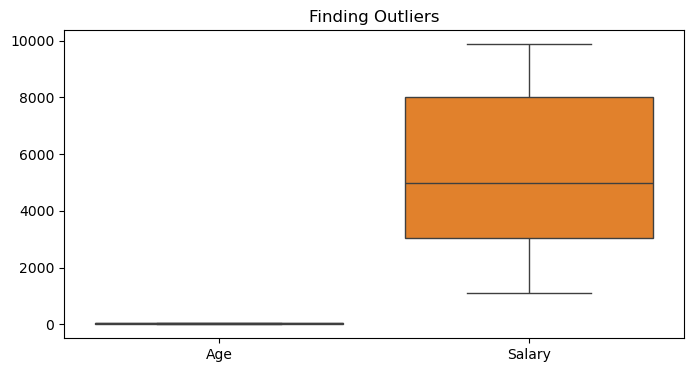

In [50]:
#Checking for outliers
numerical_columns = ['Age','Salary']
plt.figure(figsize=(8,4))
sns.boxplot(data=em[numerical_columns])
plt.title('Finding Outliers')
plt.show()
            

In [48]:
#Checking the null values
em.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Gender      0
dtype: int64

In [52]:
# Replace the value 0 in age as NaN
em['Age'] = em['Age'].replace(0,np.nan)

In [54]:
#Checking the null value after replacing 0 with nan
em.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Gender      0
dtype: int64

In [56]:
#filling the null values
for col in ['Age','Salary']:
    em[col] = em[col].fillna(em[col].median())

for col in ['Company','Place']:
    em[col] = em[col].fillna(em[col].mode()[0])

In [58]:
#Checking the null values after filling
em.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

## Data Analysis

In [79]:
#Filtering the data with age >40 and salary <5000
filtred_em = em[(em['Age']>40) & (em['Salary']<5000)]
filtred_em

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


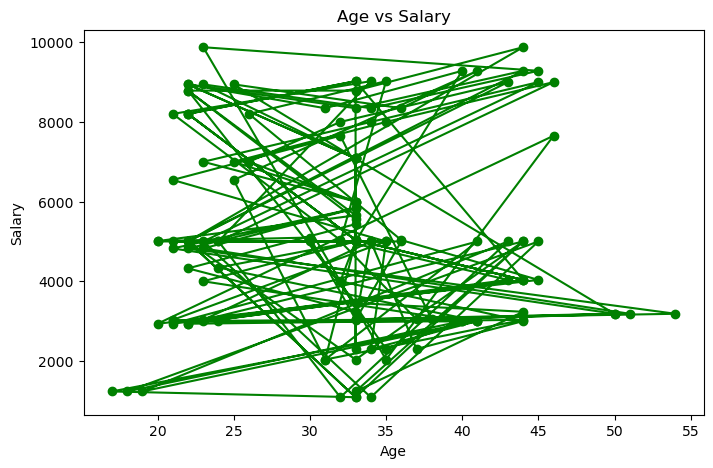

In [77]:
#Ploting the chart with age and salary
plt.figure(figsize=(8,5))
plt.plot(em['Age'],em['Salary'],marker='o',color='green',linestyle='-')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


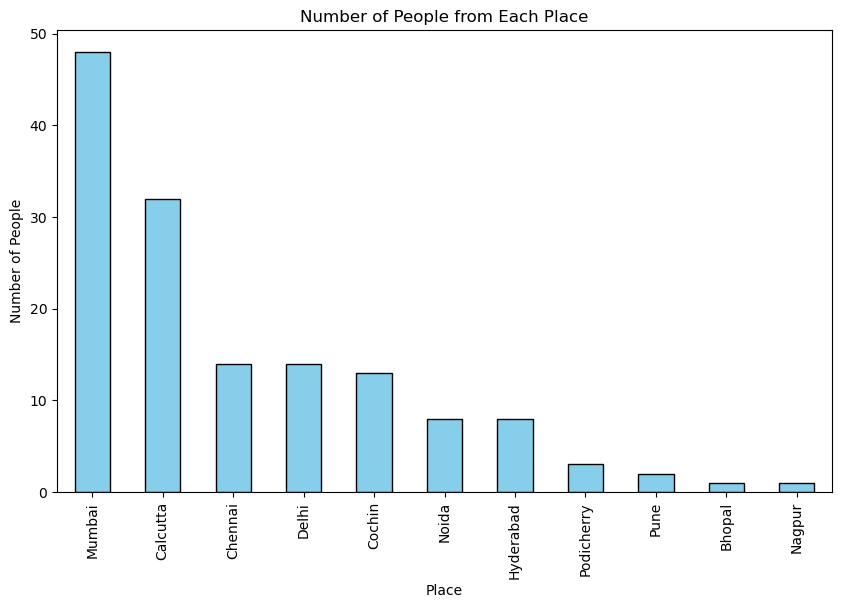

In [92]:
# Count the number of people from each place and represent it visually
count_place = em['Place'].value_counts()
print(count_place)

plt.figure(figsize=(10,6))
count_place.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Place')
plt.ylabel('Number of People')
plt.title('Number of People from Each Place')
plt.show()

## Data Encoding

In [113]:
em.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5000.0,Chennai,0
1,Infosys,30.0,5000.0,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0


In [115]:
#Convertiong categorical variable into numerical using One Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
categorical_column =['Company','Place']
encoded_categorical = encoder.fit_transform(em[categorical_column])

In [121]:
column_names= encoder.get_feature_names_out(['Company','Place'])
encoded_categorical_df= pd.DataFrame(encoded_categorical,columns=column_names)

In [134]:
new_em = pd.concat([em,encoded_categorical_df],axis=1).drop(columns=['Company','Place'])
new_em.head()

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,5000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,35.0,2300.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,3000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,4000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Scaling

In [137]:
#Scaling the numerical featue using scaling
numerica_columns = ['Age','Salary']
scaler = StandardScaler()
new_em[numerica_columns] = scaler.fit_transform(new_em[numerica_columns])

In [141]:
new_em.head()

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-1.484676,-0.100827,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.267174,-0.100827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.341577,-1.243735,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.950328,-0.947426,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.119426,-0.524127,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
